## Time Series Analysis and Forecasting with Python

In [35]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [36]:
df = pd.read_excel("Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [37]:
furniture.shape

(2121, 21)

In [38]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

#### Data Preprocessing
This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [39]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 
        'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 
        'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 
        'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [40]:
furniture = furniture.sort_values('Order Date')
furniture.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [41]:
furniture.shape

(2121, 2)

In [42]:
furniture.dtypes

Order Date    datetime64[ns]
Sales                float64
dtype: object

In [43]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

#### Grouping the data by order date

In [44]:
furniture = furniture.groupby(['Order Date']).sum()
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


### Visualizing Furniture Sales Time Series Data


In [45]:
y = furniture['Sales'].resample('MS').mean()  # it gives monthly average sales
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [46]:
y.shape

(48,)

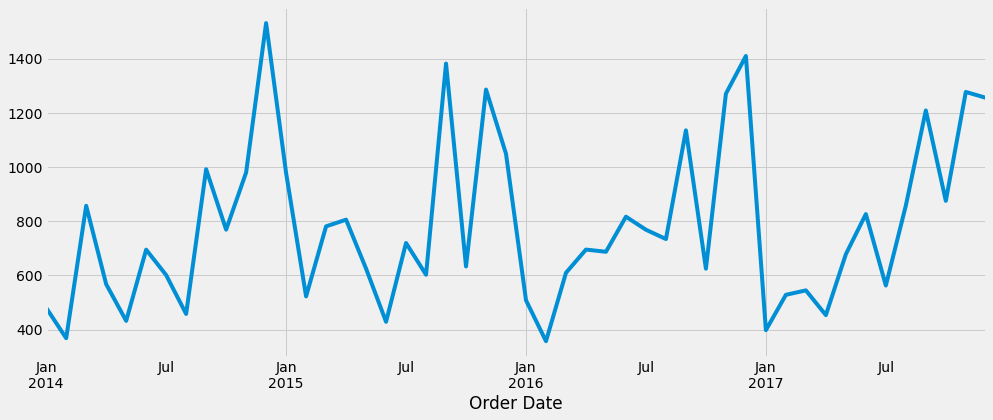

In [47]:
y.plot(figsize=(15, 6))
plt.show()

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

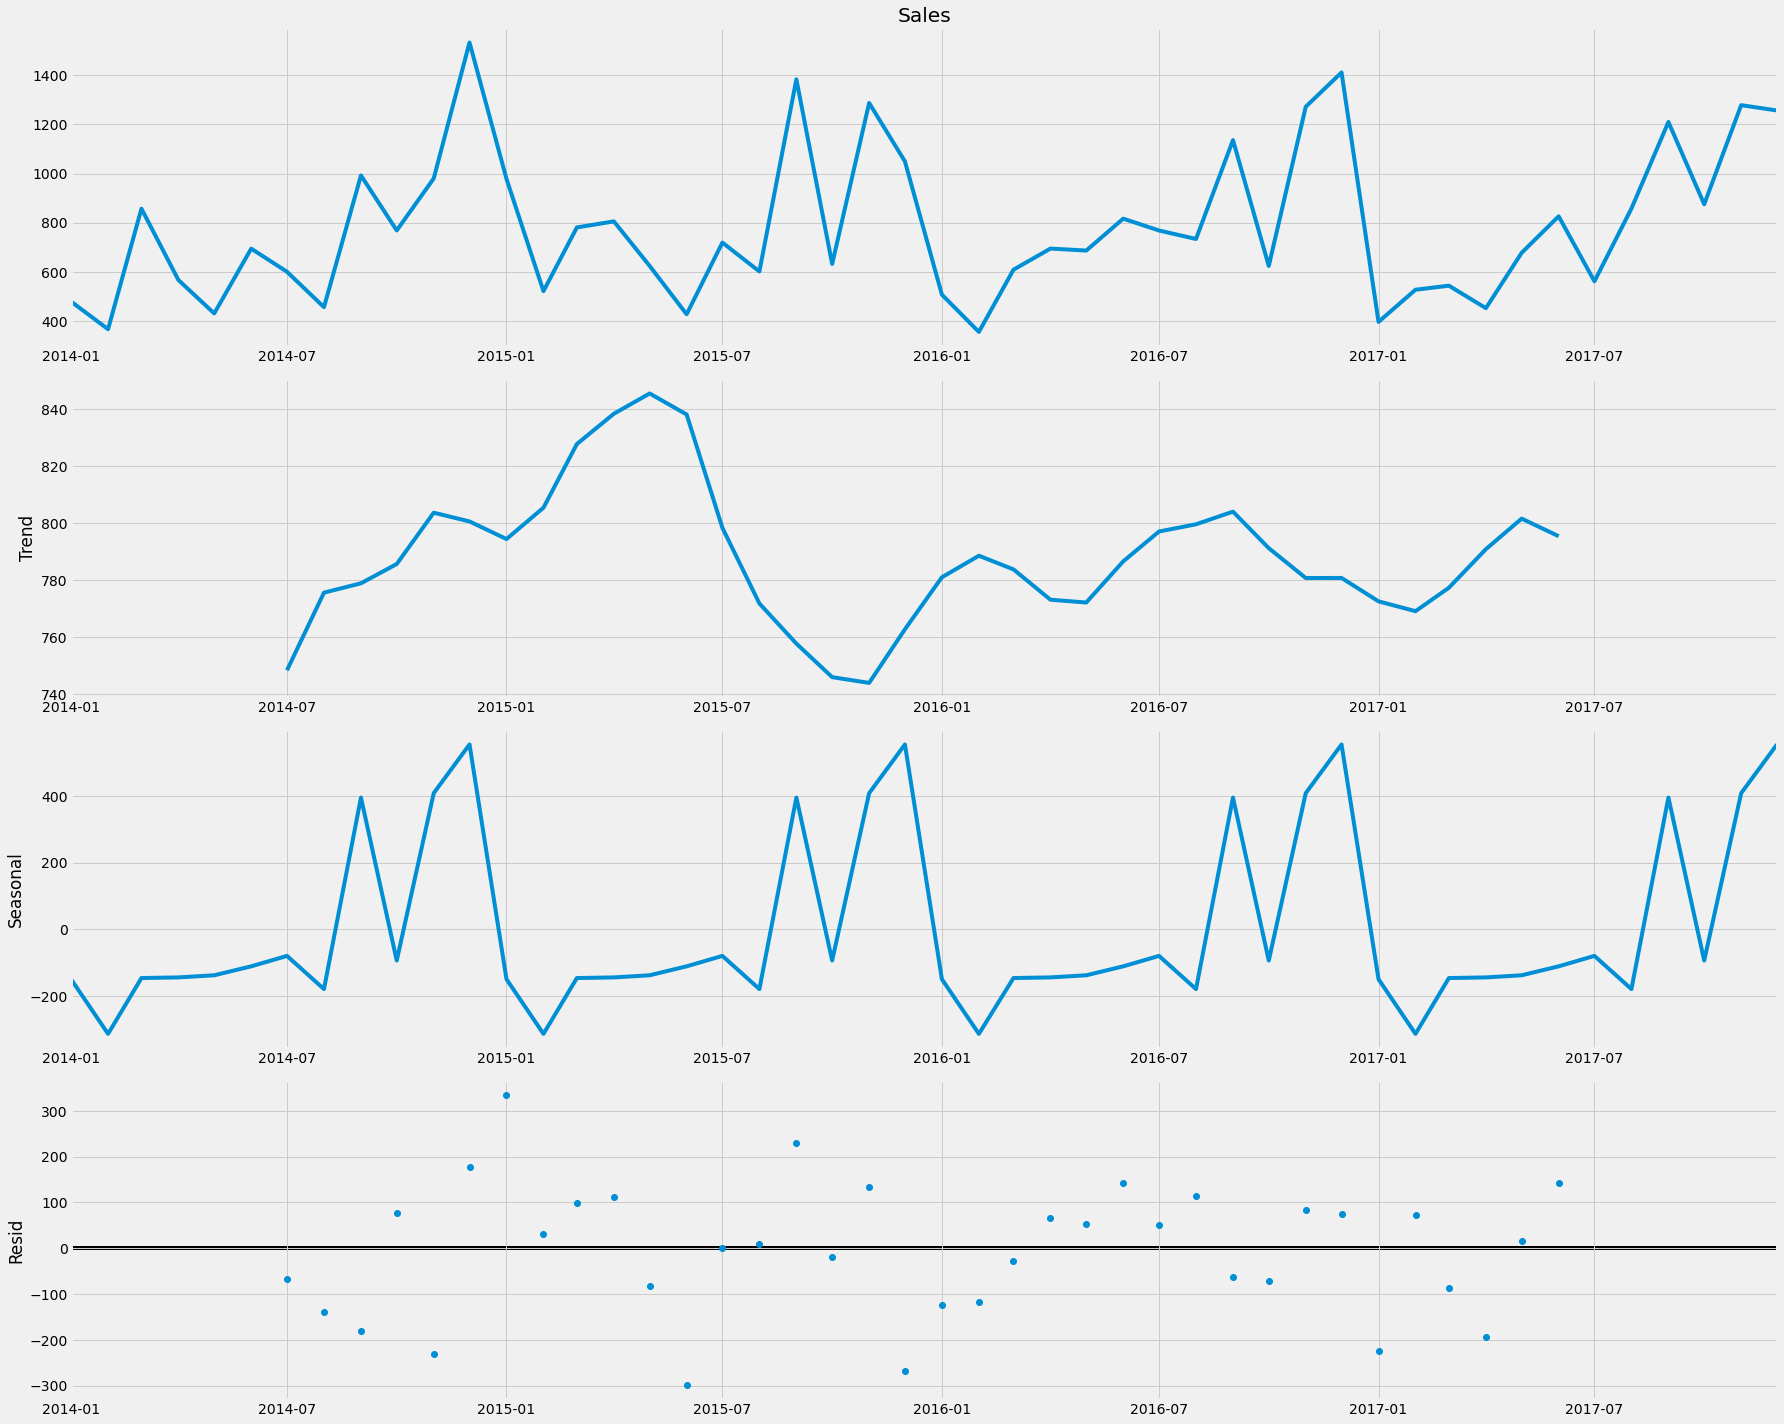

In [48]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 25, 20
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#### Time series forecasting with ARIMA
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:


In [50]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
# Since our data is monthly, so the length of one cycle (season) should be of 12 months.
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:779.7502844554544
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028999297045
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1125.6519512431782
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803673637
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758103
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2904.4447612026925
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091687
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.62613896730494
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5290771556426
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2617.4154073630843
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876927763
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576531139
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668259311
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1422.7006889772385
A

The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 283.36. Therefore we should consider this to be optimal option.
#### Fitting the ARIMA model

In [51]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415     -2.409      0.016      -1.813      -0.187
ar.S.L12      -0.0036      0.422     -0.008      0.993      -0.831       0.824
ma.S.L12      -0.3011      0.500     -0.602      0.547      -1.281       0.679
sigma2      2.476e+04   1.68e-05   1.48e+09      0.000    2.48e+04    2.48e+04


We should always run model diagnostics to investigate any unusual behavior.

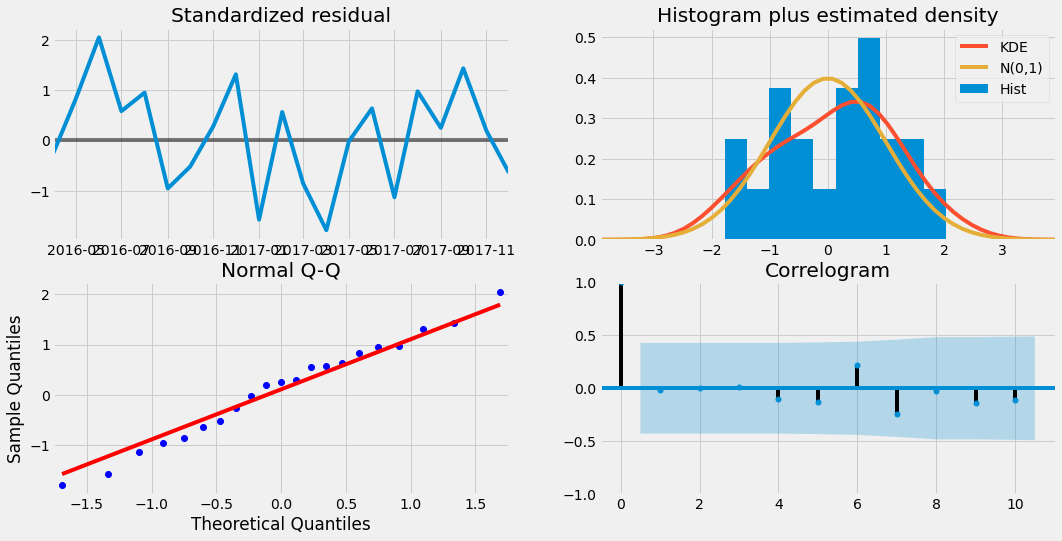

In [52]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.


#### Validating forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.


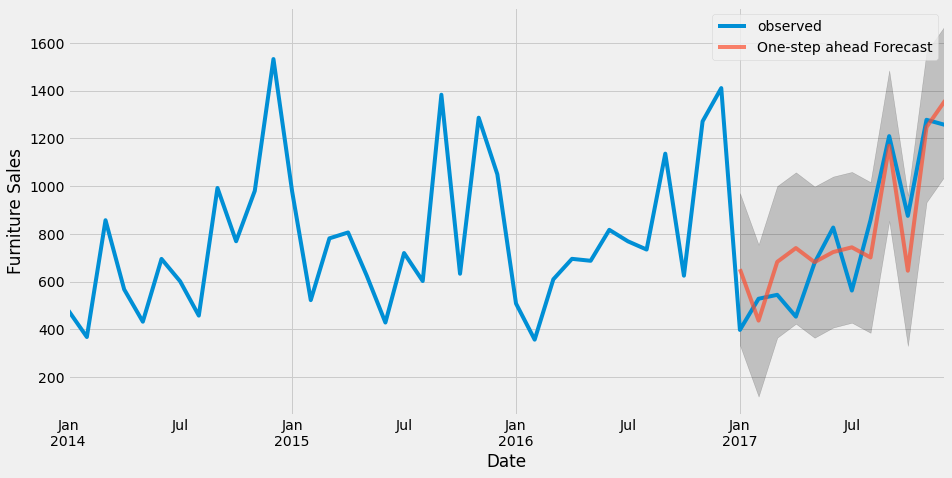

In [53]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.


In [54]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 25708.77


In [55]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 160.34


The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

#### Producing and visualizing forecasts


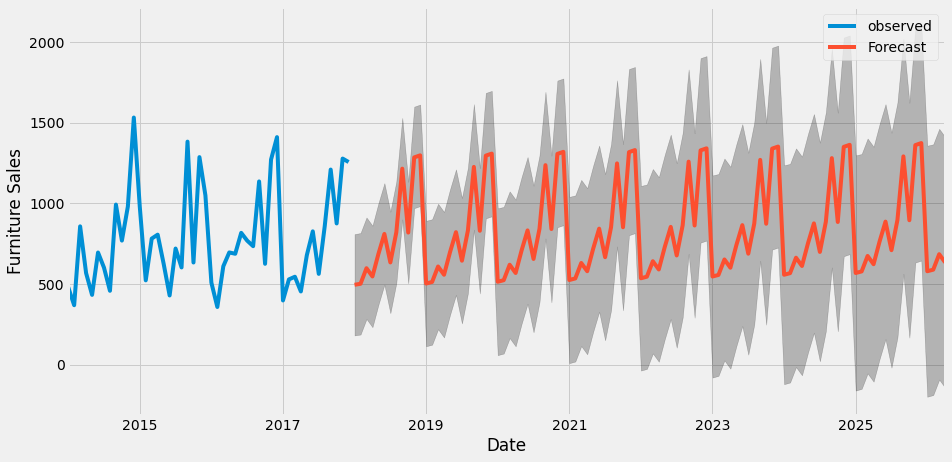

In [56]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

#### Time Series of Furniture vs. Office Supplies

In [57]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

#### Data Exploration
We are going to compare two categories’ sales in the same time period. This means combine two data frames into one and plot these two categories’ time series into one plot.


In [58]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 
        'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 
        'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 
        'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


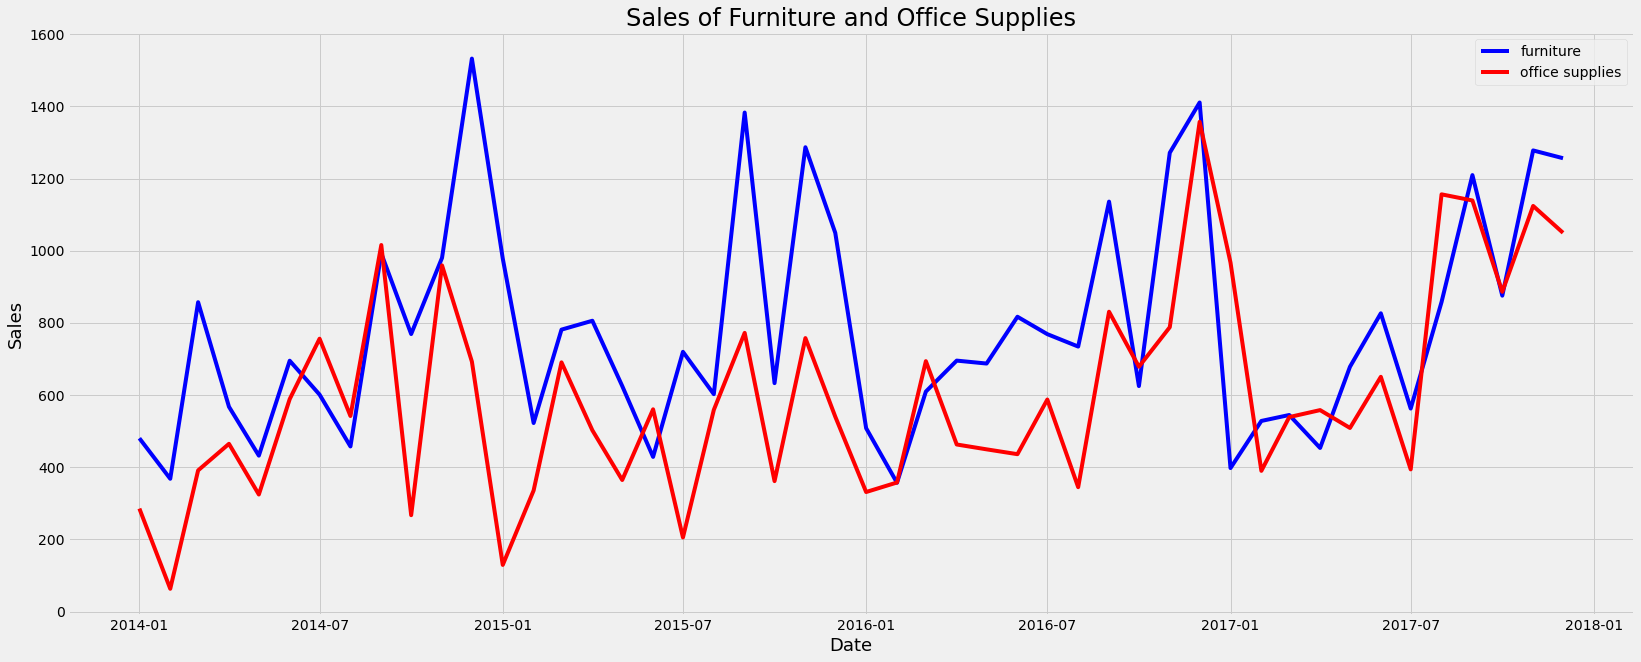

In [59]:
plt.figure(figsize=(25, 10))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date', fontsize = 18); 
plt.ylabel('Sales', fontsize = 18); 
plt.title('Sales of Furniture and Office Supplies', fontsize = 24)
plt.legend()
plt.show()

#### Time Series Modeling with Prophet
Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

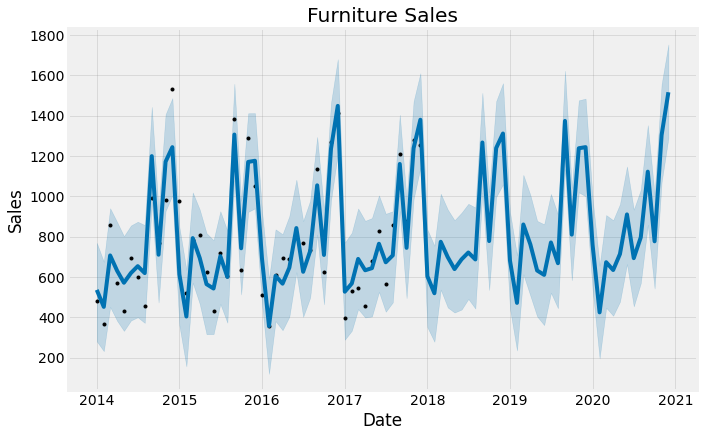

In [60]:
from fbprophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')
plt.show()

#### Compare Forecasts
We already have the forecasts for three years for these two categories into the future. We will now join them together to compare their future forecasts.


In [61]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, 
                    merge_office_forecast, how = 'inner', left_on = 'furniture_ds', 
                    right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.057713,280.146544,768.790771,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,231.793970,674.940955,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,450.918501,940.200925,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,381.819896,871.517577,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,332.101127,801.993331,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682


#### Trend and Forecast Visualization


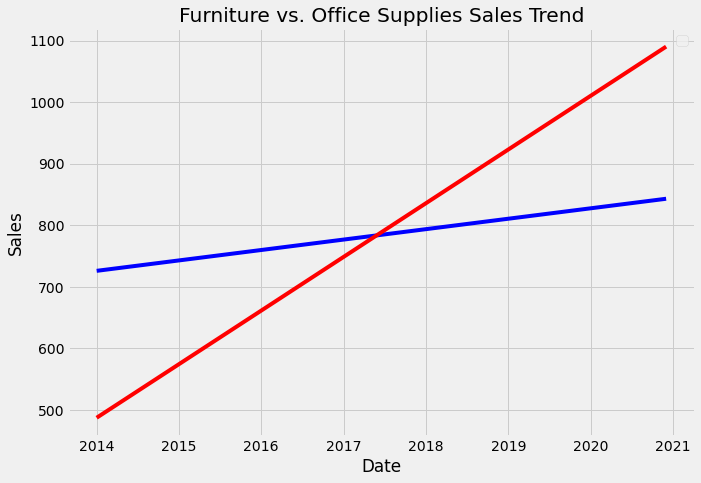

In [62]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.xlabel('Date'); 
plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');
plt.legend()
plt.show()

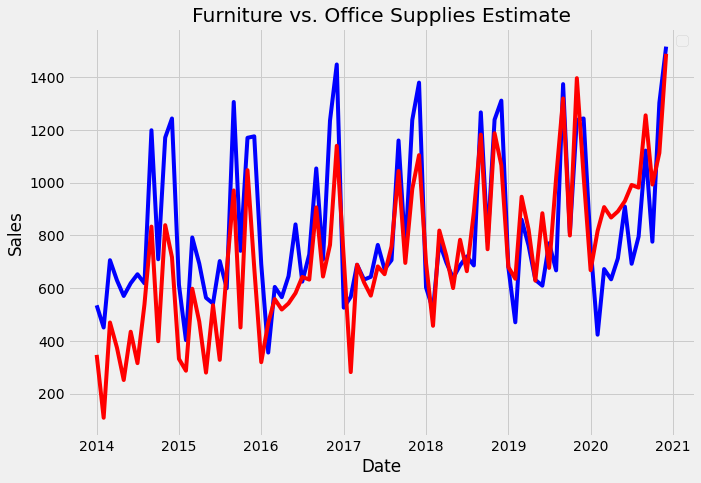

In [63]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); 
plt.xlabel('Date'); 
plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

#### Trends and Patterns
Now, we can use the Prophet Models to inspect different trends of these two categories in the data.


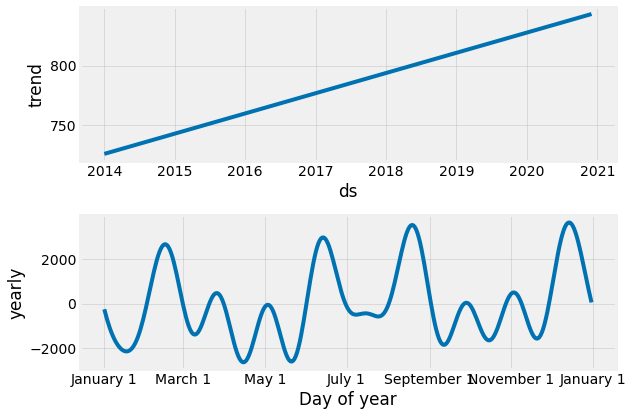

In [64]:
furniture_model.plot_components(furniture_forecast);

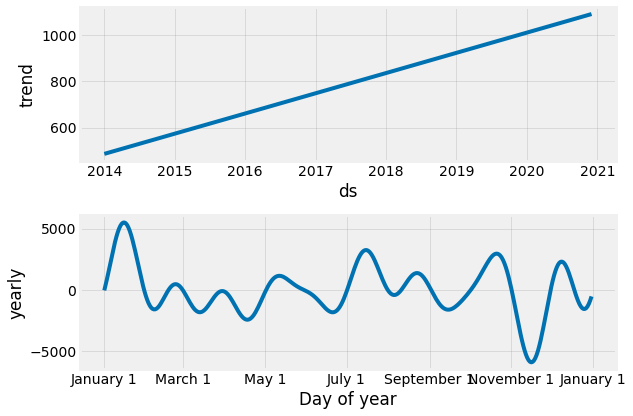

In [133]:
office_model.plot_components(office_forecast);

## New Data: AirPassangers.csv

In [65]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [66]:
#Loading Data
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [67]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [68]:
#Changing the data type of Month to datetime
data['Month'] = pd.to_datetime(data['Month'])
data.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [69]:
# Setting the index to datetime column which is Month
data.set_index('Month', inplace=True)
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [70]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [71]:
#converting to the time series:
TS = data['#Passengers']
TS.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [72]:
TS['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [73]:
TS[:'1950']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [74]:
TS['1950-03-01']

141

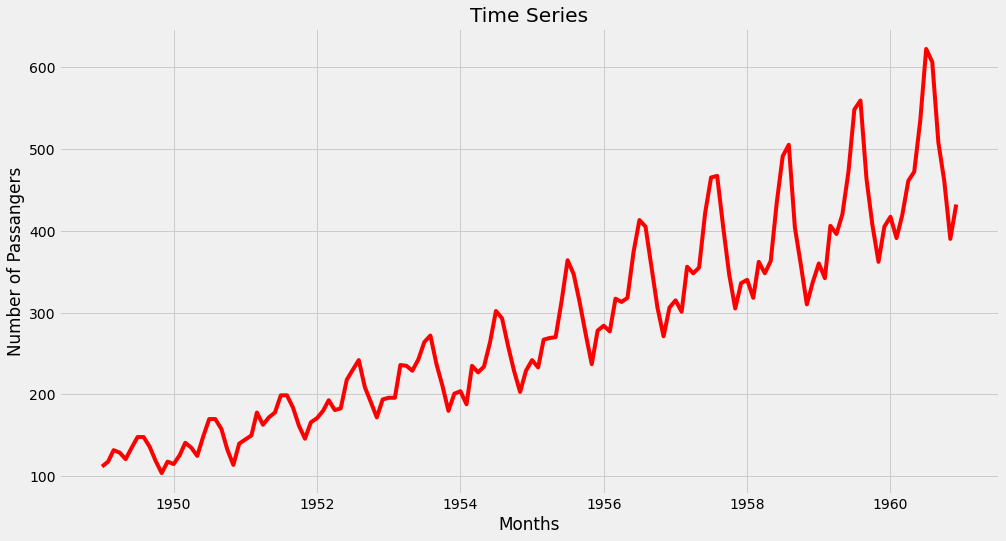

In [75]:
# Plotting the time series
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.plot(TS, color = 'r')
plt.title('Time Series')
plt.xlabel('Months')
plt.ylabel('Number of Passangers')
plt.show()

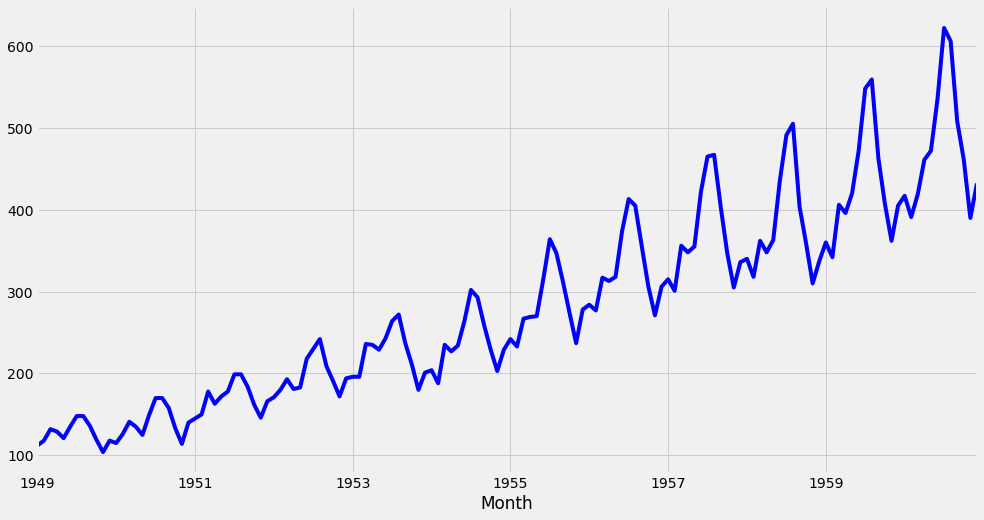

In [76]:
# Another way to plot
TS.plot(figsize=(15, 8), color = 'b')
plt.show()

### Components of a Time Series:

#### Trend:
The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

#### Seasonality:
The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions, or an increase in the number of airline passengers during holidays each year.

#### Cyclical Component: 
These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles.

#### Irregular Variation: 
These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

#### ETS Decomposition
ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend, and Seasonality.

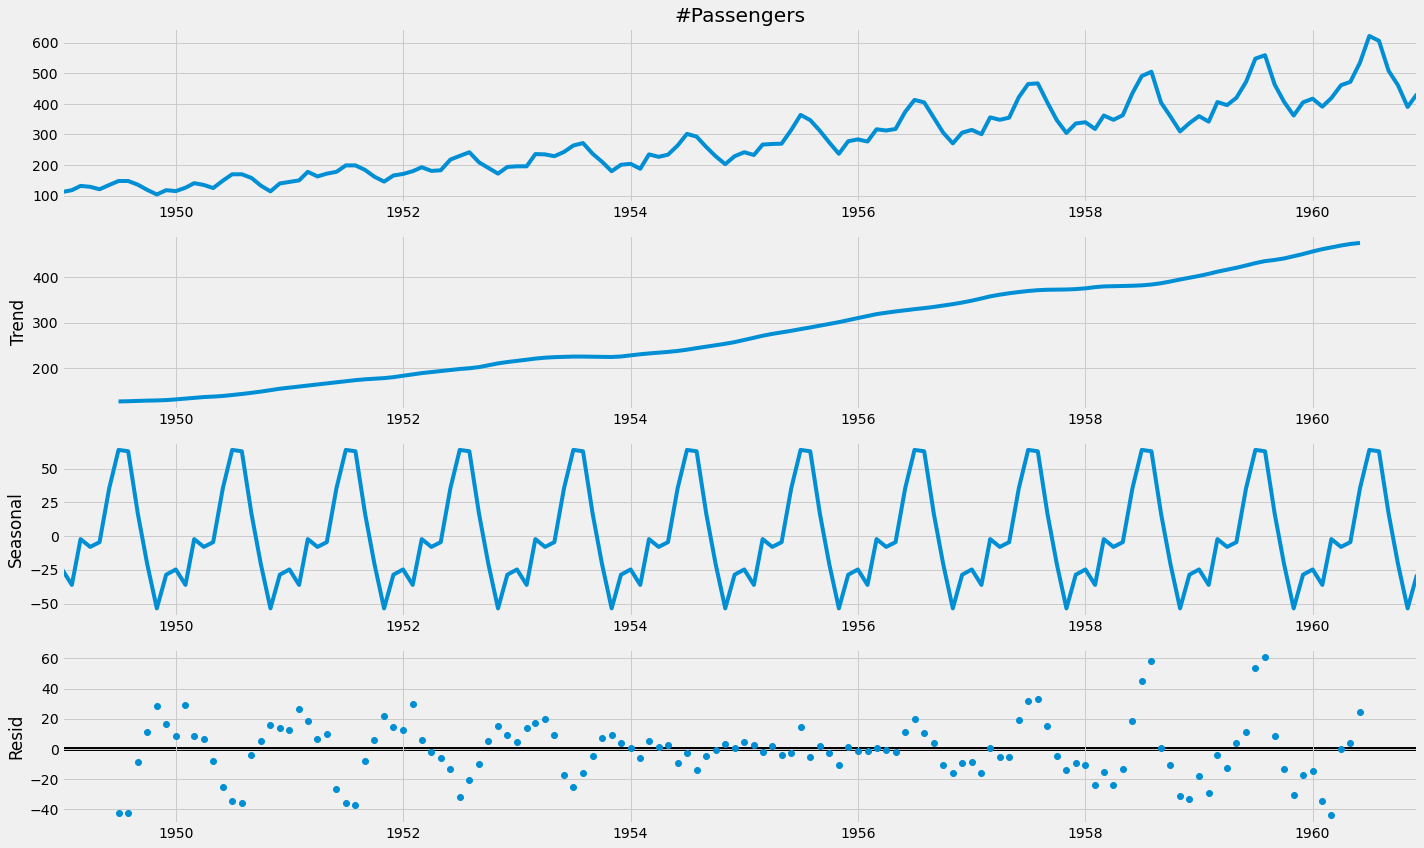

In [77]:
# Ploting ETS
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 20, 12
# ETS Decomposition 
decomposition = sm.tsa.seasonal_decompose(TS, model='additive')
fig = decomposition.plot()
plt.show()

### ARIMA Model for Time Series Forecasting
ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: (p, d, q).
#### AR(p) Autoregression 
Autoregression is a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.
#### I(d) Integration 
Integration uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
#### MA(q) Moving Average 
Moving Average is a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.
#### Types of ARIMA Model
ARIMA: Non-seasonal Autoregressive Integrated Moving Averages

SARIMA: Seasonal ARIMA

SARIMAX: Seasonal ARIMA with exogenous variables

Pyramid Auto-ARIMA

The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

### Parameter Selection for the ARIMA Time Series Model ARIMA(p, d, q)
We will use a “grid search” method to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality. 

We will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

In [78]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# one cycle (season) is of 12 months
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(TS, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2044.4329486427587
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1886.5918149565036
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1156.2914901508536
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1118.6259190717344
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1107.2562043632836
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1109.2437994445113
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1033.6172166725019
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1846.0789377571718
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1567.9916312220262
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1196.9983614399819
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1072.1382984044362
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1071.0026811969465
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1049.580141892107
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1059.5112223290423
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:985.3346478346807
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1405.0006612949667
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1194.71300109

The output of our code suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 922.20. We should therefore consider this to be optimal option out of all the models we have considered.

#### Fitting an ARIMA Time Series Model
Using grid search, we have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

We’ll start by plugging the optimal parameter values into a new SARIMAX model:

In [88]:
mod = sm.tsa.statespace.SARIMAX(TS,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.401     -0.573      0.567      -1.016       0.557
ma.L1         -0.0987      0.374     -0.264      0.792      -0.832       0.634
ar.S.L12      -0.5459      0.299     -1.824      0.068      -1.133       0.041
ma.S.L12       0.3958      0.352      1.124      0.261      -0.294       1.086
sigma2       140.2953     17.998      7.795      0.000     105.020     175.570


The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we’ll focus our attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P >|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

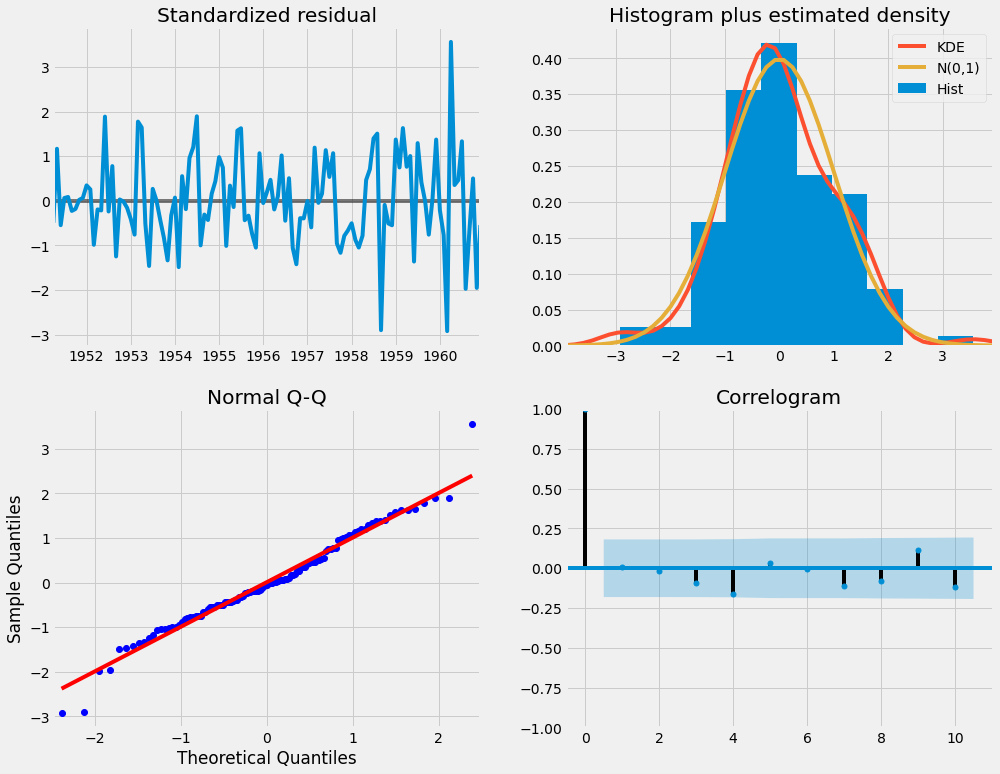

In [89]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

#### Validating Forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 1957–01–01 to the end of the data.

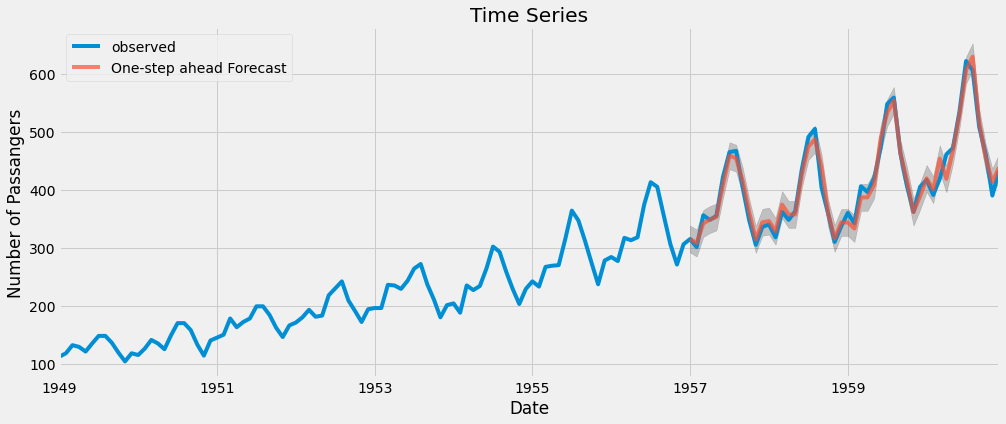

In [102]:
pred = results.get_prediction(start=pd.to_datetime('1957-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = TS['1949':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(15, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Passangers')
ax.set_title('Time Series')
plt.legend()
plt.show()


In [103]:
y_forecasted = pred.predicted_mean
y_truth = TS['1957-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 204.65


In [104]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 14.31
